<a href="https://colab.research.google.com/github/Jesus2342/MLOps_Team_33/blob/main/Fase_1_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MLOps/Fase 1/"
os.chdir(DIR)

In [31]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [24]:
data, meta = arff.loadarff('CEE_DATA.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) #Realizamos la codificación del dataset de byte a string en cada celda

<ipython-input-24-a0d1f6678b09>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) #Realizamos la codificación del dataset de byte a string en cada celda


In [25]:
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


# LIMPIEZA DE LOS DATOS

Identificamos los valores faltantes

In [26]:
valores_faltantes=df.isnull().sum()
valores_faltantes

,0
Performance,0
Gender,0
Caste,0
coaching,0
time,0
Class_ten_education,0
twelve_education,0
medium,0
Class_ X_Percentage,0
Class_XII_Percentage,0


# Exploración de los Datos

Observamos que no tenemos valores faltantes en las columnas categoricas, por lo que no hay necesidad de hacer algun tratamiento en el dataset.

**Graficamos las variables categoricas de nuestro Dataset**

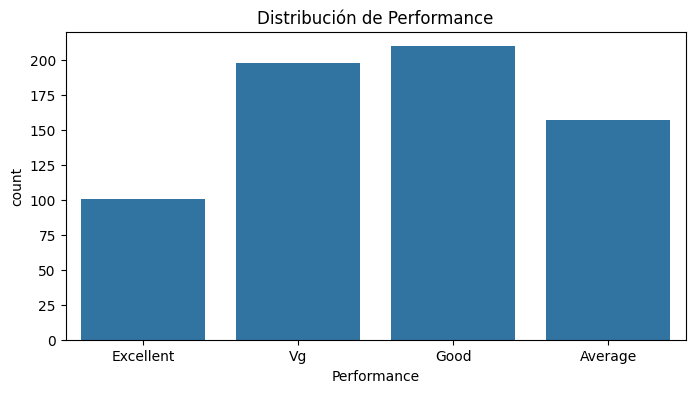

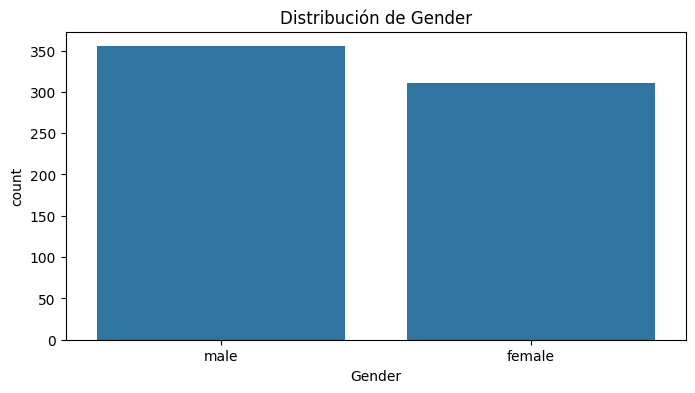

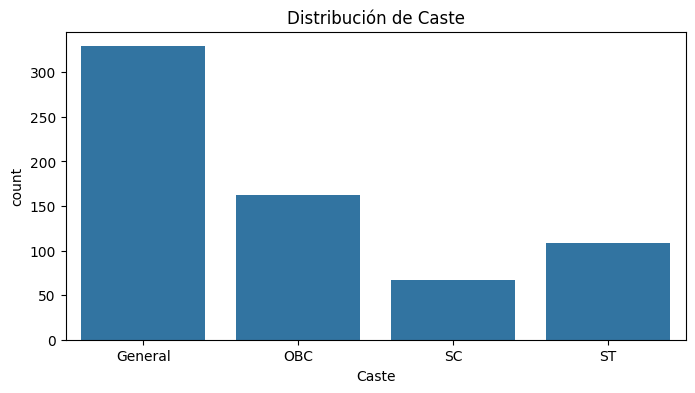

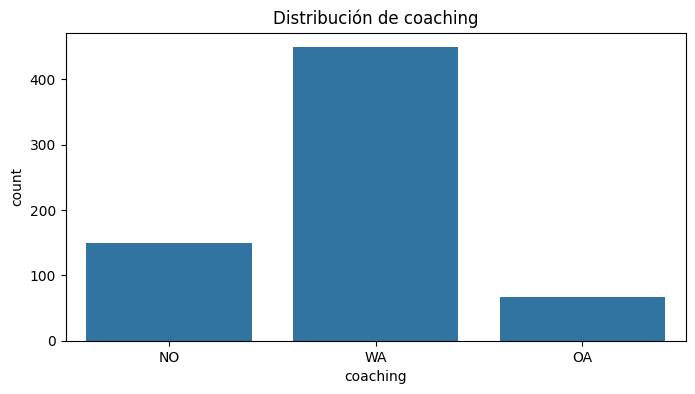

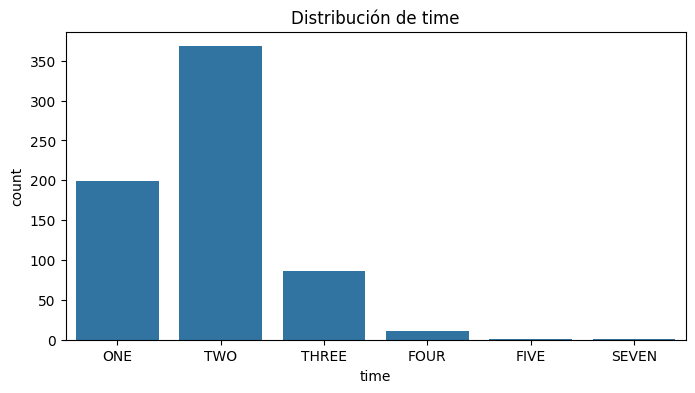

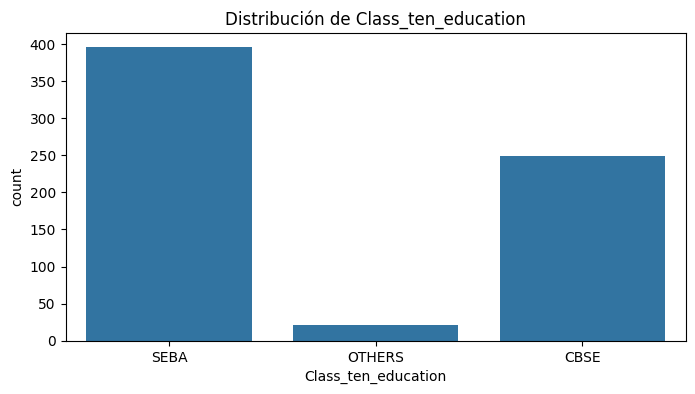

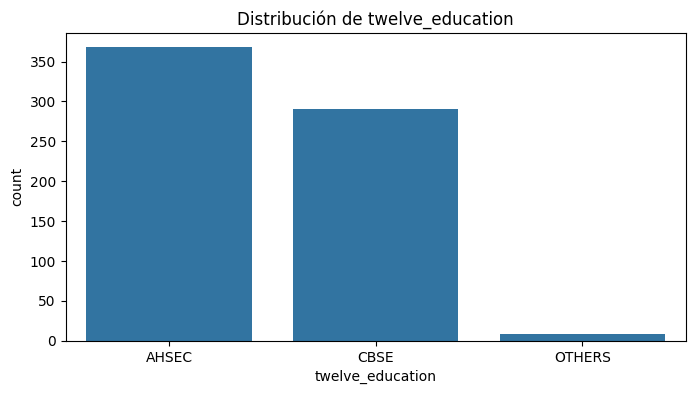

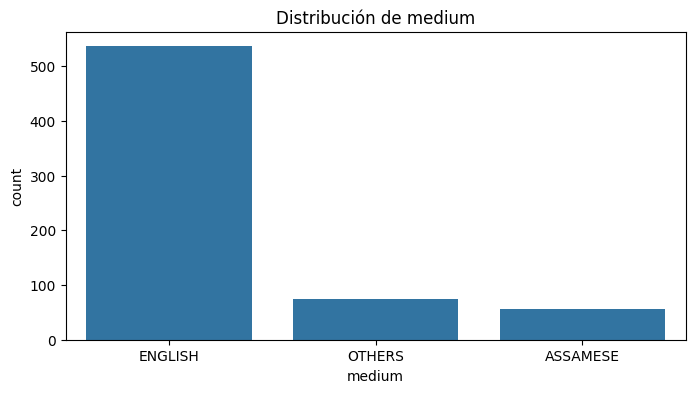

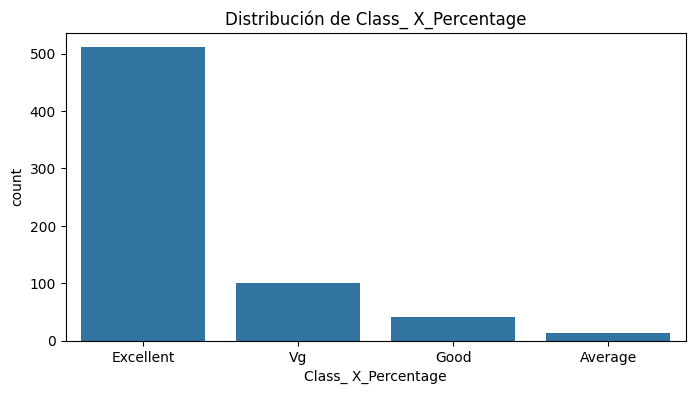

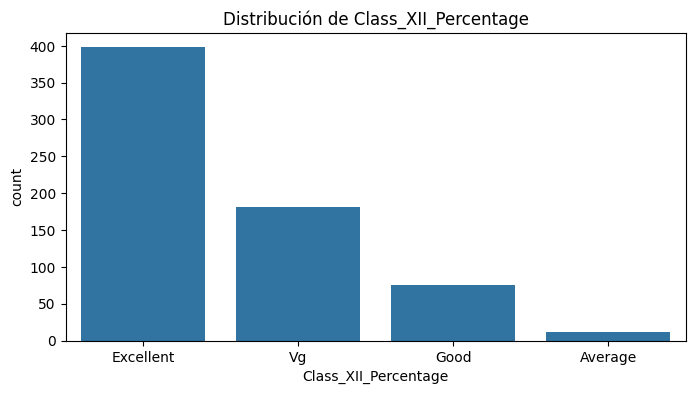

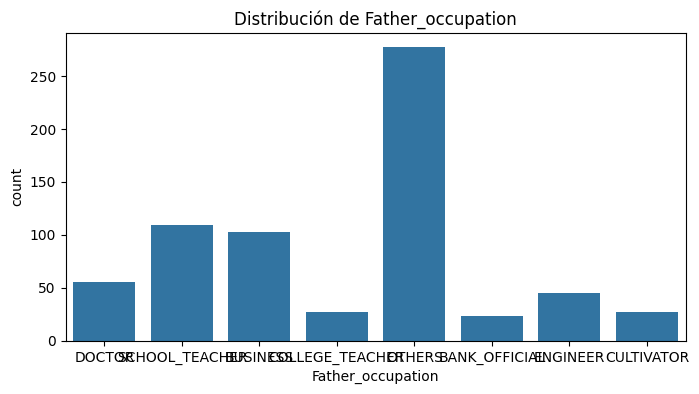

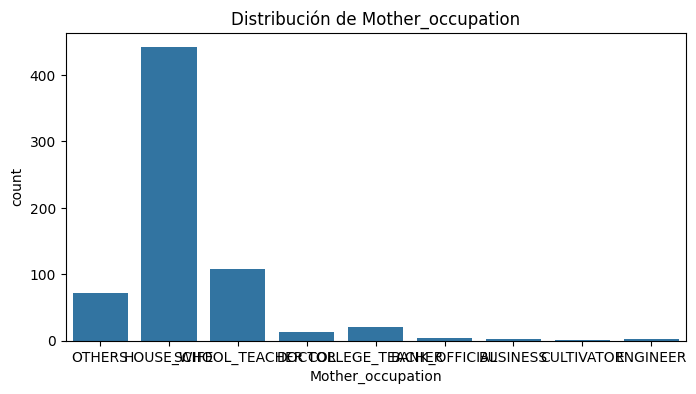

In [27]:
variables_categoricas = df.select_dtypes(include=['object'])

for columna in variables_categoricas.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=columna)
    plt.title(f'Distribución de {columna}')

**Observamos la relación de la variable target "Perfomance" con respecto a las demas variables usando un diagrama de calor.**

<Axes: >

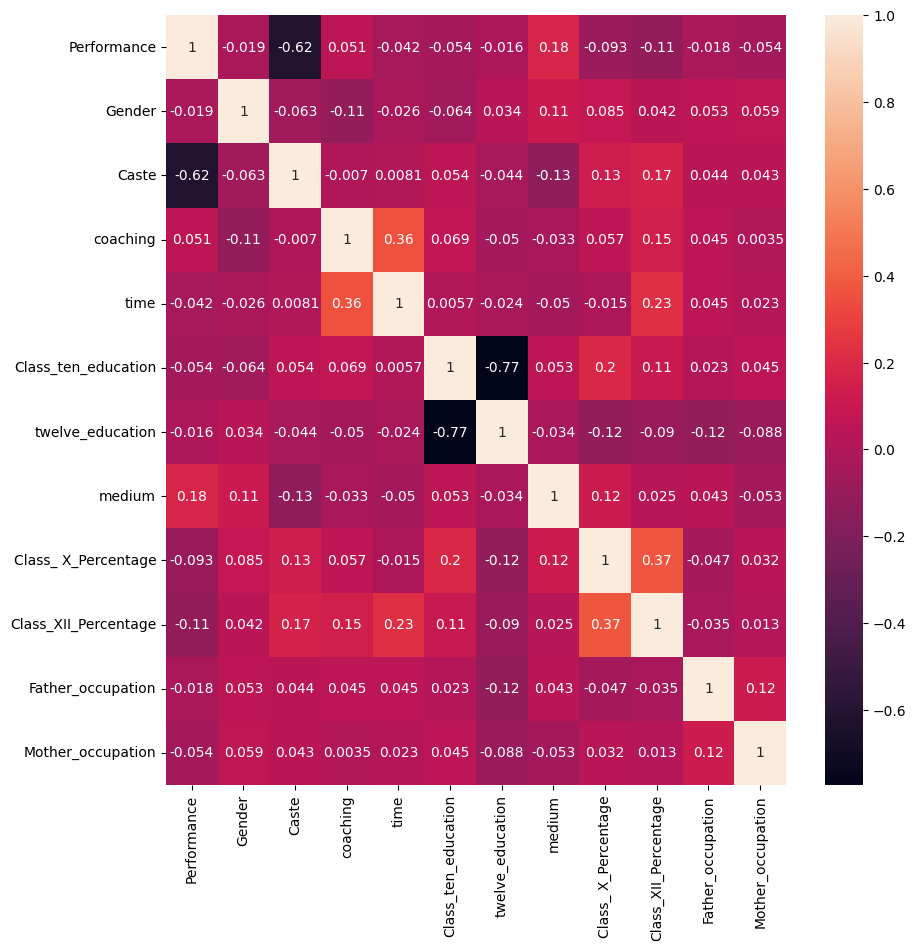

In [35]:
cat_encoder= LabelEncoder()
lista_colmuns= [col for col in df.columns]
for col in lista_colmuns:
  df[col]=cat_encoder.fit_transform(df[col])

corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

**Variables con correlación positiva:**

La variable 'Medium' muestra una correlación positiva moderada con Performance, con un valor de 0.18. Esto indica que el tipo de medio de educación está relacionado con un mejor rendimiento en la variable "Perfomance".


La variable 'Coaching' tiene una correlación positiva débil con Performance, con un valor de 0.051. Esto sugiere que la participación en actividades de tutoría tiene una relación marginalmente positiva con el Perfomance del estudiante.

**Variables con correlación negativa:**

La variable 'Caste' destaca por su correlación negativa significativa con Performance, con un valor de -0.62. Este sugiere que la pertenencia a ciertas castas tiene un impacto negativo considerable en el rendimiento.

Resultando en que diferencias socioeconómicas limitan el acceso a una buena educación lo que llega a tener un impacto en el aplicante.

# Asignamos perfomance como el taget de nuestro analisis y las demas como caracteristicas.

In [29]:
y= df['Performance']
X=df.drop('Performance',axis=1)